# Step 7 - File Reading and Writing
As we advance, we will be transfering experimental data into our models so we can visualize the relationships between time and position, voltage and current, velocity and location, etc.  This can be quite complex in general but almost always we will be reading from (and very occasionally writing) to CSV (**C**omma **S**eparated **V**alues) files.  Even here there are many ways to read from and write to these files as they are simply plain text.  In keeping with our philosphy of using python as a tool we will rely on a commonly available library: **`numpy`**.


## Getting your files where they can be read

## Explanation of the control menu

There are many ways to get **CSV** files into your notebooks. You can upload them to your virtual machine, you can put them on a remote server, but the easiest way is to read them directly from your Google Drive.  There is, however, a few steps you need to get through to create this connection.

Let's assume you have uploaded your files into a specific folder on your ![Drive Icon](https://www.gstatic.com/images/branding/product/1x/drive_16dp.png)`Drive` and want to read your data into a **`numpy`** array.

We need to get your **CSV** files onto the storage used by your virtual machine.  In the upper left corner of your virtual machine is a small folder icon (<img src="https://drive.google.com/uc?id=1-GpIDgB9D8GXV48sNQ887IHlv1fFdPN3">). Click on it and you will see 3 tabs (as of this writing).

  - **Table of Contents**:   *a table of contents automatically generated for the current notebook*
  - **Code Snippets**: *Small snippets of code for doing specific things, here, for example, you'll find other ways to pull data into your notebook.*
  - **Files**: *A directory of files populated into your virtual computer. and submenus*
    - *UPLOAD*: select specific files to upload to your virtual machine
    - *REFRESH*: update your view of the files
    - ![Drive Icon](https://www.gstatic.com/images/branding/product/1x/drive_16dp.png)*MOUNT DRIVE*: This is the one we are after, connecting to your Drive folders.

  

## How to connect your virtual machine to your Drive folders

Once you have opened the side panel and opened the Files tab click on the '![Drive](https://www.gstatic.com/images/branding/product/1x/drive_16dp.png)`Mount Drive`'  subtab. Below the current cell the following code will be pasted into a new code cell:
```python
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')
```

Run the cell and you will be prompted for you to click on a link so you can authorize a connection to your Drive.  You will then be presented with a special key which you copy and paste in a text box below the code cell.  Paste the code in the box and you are ready to go!

You should see a nested hierarchy of files below the ``Files`` tab on the open panel. Open the folder labelled `drive` and you can now see your list of files. We will only be concerned with the ones labelled with a `.csv` extension. 

You can delete the code lines inserted into your notebook. You wont need them again. 

## Reading file data

As mentioned above there are many ways of reading data from files. They all require we identify the file (duh) and in this instance we do so with a file path. The easiest way to get your file path is to find it in the list hierarchy and right click on the file you want.  One of the options is to 'copy path'

Once you have this path paste the string between the quotes below with your path.  (**NB**: All pathname s copied this way are 'absolute' pathnames without going into detail right now you must add a leading forward slash '/' in front of your pasted path.*)

We could write a short segment of code to read the lines in by using a csv file reader package but in the philisophical spirit of using python as a tool we will use the **`numpy`** package.

CSV files come in a wide variety of flavors.  Other than organizing data in rows with columns separated with commas, anything is possible.  Most of the programs we work with are reasonably predictable.
   - the first line is usually a set of strings identifying the values in the column, for example the header might say: `"Time [s]","Pos [m]","Vel [m/s]" etc.
   - subsequent lines are simply lists of comma separated numbers.  We need to know a little about what we are dealing with to import the numbers.
   - fortunately this is easy. 


In [0]:
import numpy as np

# now that you have an idea of how the file starts you can set the
# call up correctly, skipping over the first line.
csvFile = "/content/sample_data/california_housing_train.csv"
# dispay the first 10 lines.
!head $csvFile

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000
-114.580000,33.630000,29.000000,1387.000000,236.000000,671.000000,239.000000,3.343800,74000.000000
-114.580000,33.610000,25.000000,2907.000000,680.000000,1841.000000,633.000000,2.676800,82400.000000
-114.590000,34.830000,41.000000,812.000000,168.000000,375.000000,158.000000,1.708300,48500.000000
-114.590000,33.610000,34.000000,4789.000000,1175.000000,3134.000000

If you have a bunch of csv files from the same source you only have to do this for the first one.
  - the first line is as expected, a list of labels for each column
  - the subsequent lines are just data values but not aligned nicely.

Now you have to make some choices:
  - we want to skip the first line to get the data
  - find out which columns we want.  Let's just get the first two columns.

In [0]:
# now that you have an idea of how the file starts you can set the
# call up correctly, skipping over the first line.
csvFile = "/content/sample_data/california_housing_train.csv"

# pull in the first two columns: 0,1, with a delimiter of ',' and skip the first line
xlat, xlog = np.loadtxt(csvFile, skiprows=1, usecols=(0,1), delimiter=",", unpack=True)

# the following line is optional in case you want to extract the titles, just like we did above but grab only the first line.
titl0, titl1 = np.loadtxt(csvFile, max_rows=1, usecols=(0,1), delimiter=",", dtype="str", unpack=True)

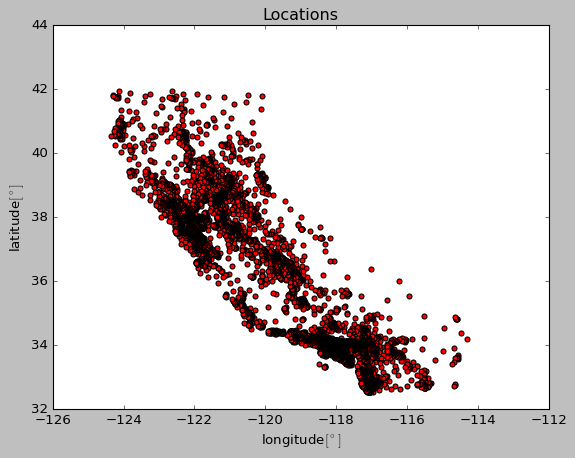

In [0]:
import matplotlib.pyplot as plt

## PLOT AS USUAL
plt.style.use('classic')

plt.scatter(xlat, xlog, c='r')

plt.xlabel(titl0[1:-1] + "$[^\circ]$") # [1:-1] gets rid of the leading and trailing quotes
plt.ylabel(titl1[1:-1] + "$[^\circ]$") # [1:-1] gets rid of the leading and trailing quotes
plt.title("Locations")

plt.show()

Almost looks like the state of california.

## File Examples

### Before you run the examples
Let's set up the example files.

In [0]:
# I'll explain these instructions in detail later but for now just run this cell
# https://drive.google.com/file/d/1YVA2AVj8csh6fpTELZrXntroGJDr8X4P
!curl -L "https://drive.google.com/uc?id=122e8VYGOXm7qRsZKUtebZtTTfAl8tHlZ" >sample_data/MagDrop3.csv
!curl -L "https://drive.google.com/uc?id=16bJrRJbwZjqfNMIpblgU0XYS6dZKu7Ca" >sample_data/TerminalVelocity.csv
!curl -L "https://drive.google.com/uc?id=1YVA2AVj8csh6fpTELZrXntroGJDr8X4P" >sample_data/RunningDownHill.csv


Normally you would just attach to your Google Drive and get the files from your own directory.  What we did here is pull some publicly available example data sets into our 'local' file system.  

The above commands access a website (using an external non-python program called **`curl`**) and copies the contents of specific files into the named files.  This way you have example csv data in your 'sample_data' folder.  

> <font size="-1">*for the geeky*: curl is like a command line 'browser', it fetches just the raw html from a website. In this case you may notice that the url is set up exactly the way we transfer images from a publicly shared space on our Drive. The **`-L`** means follow any redirects to the source document.</font>

### Example 1
where we just pull the data in and look at it.

Here we begin to practice manipulating data held in files. The files we will manage will always be some kind of 'csv' file.  This just means that the information is organized in seperate file of n rows in such a way that there are m values separated by commas.
e.g.
```
# data.csv:
Time [s],Channel A [V],Channel B [V]
0,0.007443,0
0.000390625,0.007443,-0.025
0.00078125,0.007443,0
0.001171875,0.007443,-0.025
```
This file contain 4 rows of 3 values each.  The idea is to import this into an array of 4 rows and 3 columns. As we will see we can be very specific about what rows and columns we import but we will start simple.

In [0]:
# First lets load some important tools
import numpy as np
import matplotlib.pyplot as plt

By importing these two libraries we can easily pull in the data into arrays that are effectively like the spreadsheet rows and columns we are used to.

In [0]:
# set our file
csvFile = 'sample_data/MagDrop3.csv'
!head "$csvFile"  # need the quotes in case the above path has spaces in it.

Time [s],Channel A [V],Channel B [V]
0,0.007443,0
0.000390625,0.007443,-0.025
0.00078125,0.007443,0
0.001171875,0.007443,-0.025
0.0015625,0.004962,0
0.001953125,0.004962,0.025
0.00234375,0.004962,-0.025
0.002734375,0.007443,0.025
0.003125,0.007443,0


In [0]:
# pull in the first two columns: 0,1, with a delimiter of ',' and skip the first line, 
#     the last item allows us to pull two columns at once and set them to two separate variables at once (very pythonic)
time, volt = np.loadtxt(csvFile, skiprows=1, usecols=(0,1), delimiter=",", unpack=True)

# the following line is optional in case you want to extract the titles, just like we did above but grab only the first line.
titl0, titl1 = np.loadtxt(csvFile, max_rows=1, usecols=(0,1), delimiter=",", dtype="str", unpack=True)

That's it! with one line we can read and interpret the values ready for manipulation.

Now let's see what it looks like.

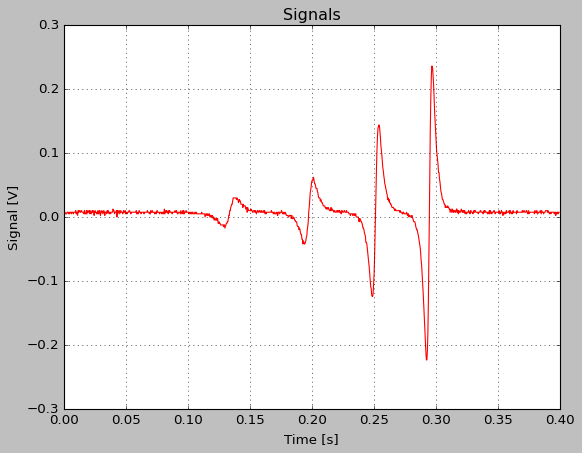

In [0]:
## PLOT AS USUAL
plt.style.use('classic')

plt.plot(time, volt, c='r')

plt.xlabel(titl0) # Use the imported labels
plt.ylabel("Signal [V]") # Or make up your own DON'T FORGET THE UNITS!
plt.title("Signals")
plt.grid(True)

plt.show()

### Example 2
where we pull the data and fit a part of it to a straight line fit.

Let's try another one. Import a raw data set that has position vs time information. This file represents an object that was dropped but experienced air resistance. What we want to do is to determine the terminal speed of the object. Notice how we can check our input by looking at a graph. This is often more compact and easier to make sure we have imported what we think we have.

In [0]:
# If you imported these libraries above then calling them again doesn't do anything.
import numpy as np
import matplotlib.pyplot as plt

csvFile = "sample_data/TerminalVelocity.csv"
!head "$csvFile"  # this is a different file and may be structured differently

"Time [s]","Position [m]"
0.023905723905723875, 0.6502624282036051
0.18242424242424238, 0.6322489601901371
0.3409427609427609, 0.6078777975836804
0.4994612794612794, 0.5813874034462274
0.6579797979797979, 0.5506585462467819
0.8164983164983164, 0.5167508417508422
0.9750168350168351, 0.4817835214894042
1.1335353535353534, 0.4425777381659739
1.2920538720538721, 0.40443157060804147


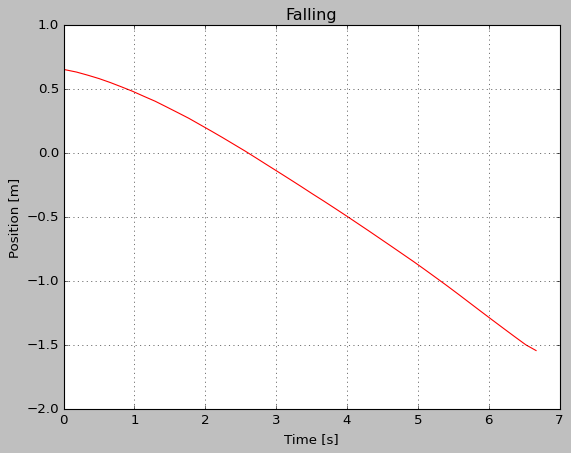

In [0]:
# pull in the first two columns: 0,1, with a delimiter of ',' and skip the first line, 
#     the last item allows us to pull two columns at once and set them to two separate variables at once (very pythonic)
time, pos = np.loadtxt(csvFile, skiprows=1, usecols=(0,1), delimiter=",", unpack=True)

# the following line is optional in case you want to extract the titles, just like we did above but grab only the first line.
titl0, titl1 = np.loadtxt(csvFile, max_rows=1, usecols=(0,1), delimiter=",", dtype="str", unpack=True)

## PLOT AS USUAL
plt.style.use('classic')

plt.scatter(time, pos, c='r')

plt.xlabel(titl0[1:-1]) # [1:-1] gets rid of the leading and trailing quotes
plt.ylabel(titl1[1:-1]) # [1:-1] gets rid of the leading and trailing quotes
plt.title("Falling")
plt.grid(True)

plt.show()

We want to analyze the tail end of the graph so lets see how we can extract just a portion of the data.  From the graph it looks like we want everything past 3.5 seconds.  Getting information from arrays is built around finding the integer indicees (row numbers) in the data set.  This could be tricky but fortunately **`numpy`** has a built in tool for this.

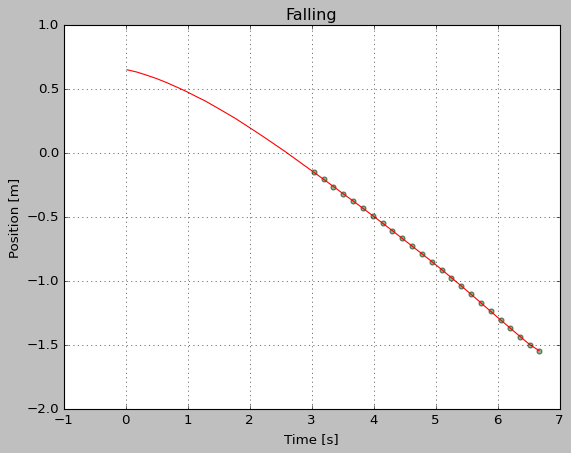

In [0]:
# collect the indicies where the time falls into a specific range.
# we want values that fall between 3.0 and 7 seconds
# notice how this is organized...
indices = np.where((time > 3.0) & (time < 7.0)) # because of PEMDAS you have to put the inequalities in parentheses
# in prose this statement would read:
#   'find me the array indices where time is greater than 3.5 AND less than 7.0'

# plot what think we did.  Note that this is exactly the same code as above but 
# one additional line
plt.plot(time, pos, c='r')  # we are only looking to visualize our selection
plt.scatter(time[indices], pos[indices], c="g", alpha=0.5)

plt.xlabel(titl0[1:-1]) # [1:-1] gets rid of the leading and trailing quotes
plt.ylabel(titl1[1:-1]) # [1:-1] gets rid of the leading and trailing quotes
plt.title("Falling")
plt.grid(True)

plt.show()

In [0]:
# now fit the data (output is slope first with the intercept second)
m, b = np.polyfit(  # fit function
    time[indices], # x
    pos[indices], #y
    1 # order 1=linear, 2=quadratic
    )
print(f"m:{m:6.3} m/s") # and this experiment doesn't care about the intercept

m:-0.388 m/s


Time to check the fit:
We just want to re-plot the original data and then superimpose the fit. Do this once and you can just copy and paste your program for all subsequent plots.  You don't have to memorze 10 menu steps and tabs in a modal dialog.

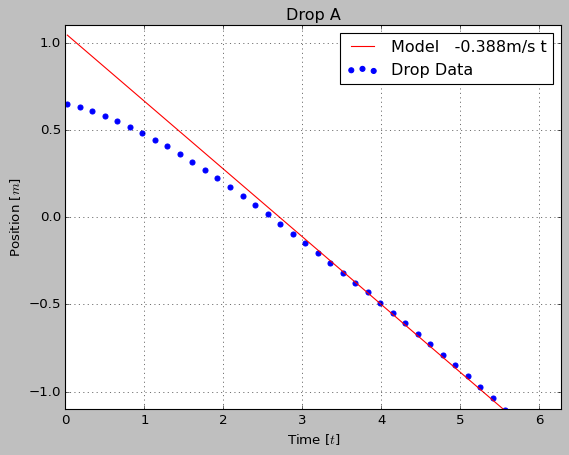

In [0]:
# plot the model over the whole time interval
# This is a 'plot' rather than a scatter because it IS a model not a sampling:
plt.plot(time, m * time + b,
         color="red", label=f"Model {m:8.3}m/s t")

# The raw data, however, is a sampling:
plt.scatter(time, pos,
         color="blue", label="Drop Data")

# decorate the graph with proper labels and units 
#      (the r prefix will invoke the LaTex editor)
plt.xlabel("Time [$t$]")
plt.ylabel("Position [$m$]")
plt.title("Drop A")
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)

plt.grid(True)

plt.legend(loc="upper right")

plt.show()

All done. With some additional annotation this whole document could serve as your lab report. The first time you do this it takes a little time. With a bit of practice this will go faster.  More importantly, if there is some complicated sequence, you have a full record of what you did so all you have to do is to copy something that worked before, copy it and paste it in the new document.

### Example 3
where we get some data but have to 'linearize' it before fitting the results.

What we have is data from an experiment that measures the speed of an object as it rolls down a hill.  One detail that is not in the data is the fact that at position 0.0

In [0]:
# If you imported these libraries above then calling them again doesn't do anything.
import numpy as np
import matplotlib.pyplot as plt

csvFile = "sample_data/RunningDownHill.csv"
!head "$csvFile"  # this is a different file and may be structured differently

"Position [cm]","Speed [cm/s]"
5.,29.89
10.,42.72
15.,51.51
20.,57.58
25.,65.43
30.,72.27
35.,78.80
40.,83.27
45.,88.34


So we have the data but we want to make sure we have the implicit datapoint built into the experiment which will play a critical role in our interpretation of the results.  This experiment was designed to start at rest (0$\frac{cm}{s}$) when the object started at position 0.0$cm$.

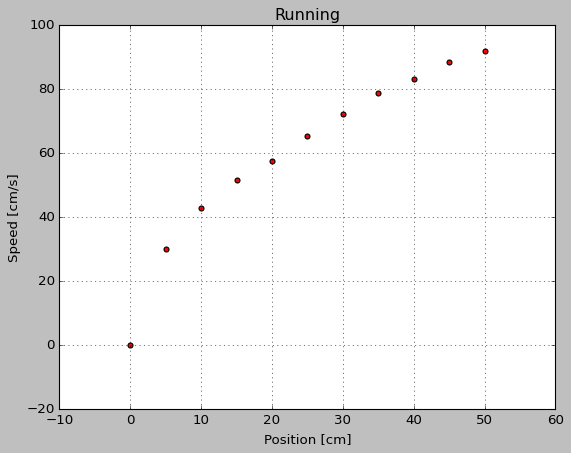

In [0]:
# pull in the first two columns: 0,1, with a delimiter of ',' and skip the first line, 
#     the last item allows us to pull two columns at once and set them to two separate variables at once (very pythonic)
pos, vel = np.loadtxt(csvFile, skiprows=1, usecols=(0,1), delimiter=",", unpack=True)

# the following line is optional in case you want to extract the titles, just like we did above but grab only the first line.
titl0, titl1 = np.loadtxt(csvFile, max_rows=1, usecols=(0,1), delimiter=",", dtype="str", unpack=True)

############
# Additional line, otherwise everything else is just copied and pasted from the examples above
pos = np.append(pos, 0.0)
vel = np.append(vel, 0.0)
############

## PLOT AS USUAL
plt.style.use('classic')

plt.scatter(pos, vel, c='r')

plt.xlabel(titl0[1:-1]) # [1:-1] gets rid of the leading and trailing quotes
plt.ylabel(titl1[1:-1]) # [1:-1] gets rid of the leading and trailing quotes
plt.title("Running")
plt.grid(True)

plt.show()


Without the 0 vs 0 point built in we might have missed the observation that this data appears to follow a form that resembles a $y=\sqrt{x}$ type form.  If we square both sides we can fit it to a straight line.

$
\left( y = \sqrt{ A \cdot x } \right)^2 \Rightarrow y^2 = A \cdot x
$

So we need to append a new array with the y values squared.

In [0]:
# cool trick, not required to set the universal printing options.
np.set_printoptions(precision=2, threshold=6, suppress=True, nanstr='⍉', infstr='∞')

# re-calculate the y values for a linearization guess
velSq = vel**2
print(f"vel^2 [cm^2/s^2]")
print(f"{velSq}")

print(f"pos [cm]")
print(f"{pos}")


vel^2 [cm^2/s^2]
[ 893.41 1825.   2653.28 ... 7803.96 8449.29    0.  ]
pos [cm]
[ 5. 10. 15. ... 45. 50.  0.]


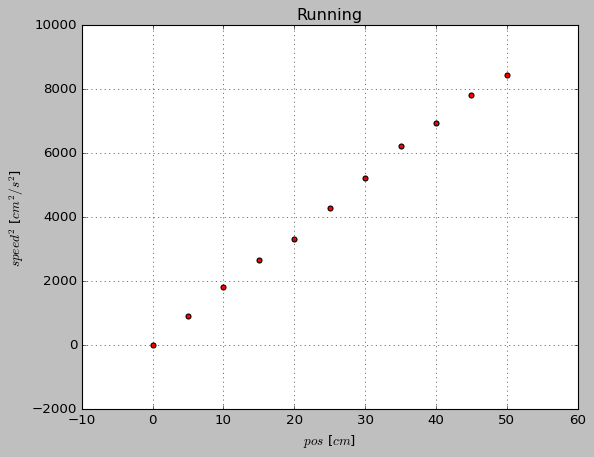

In [0]:
## PLOT AS USUAL (Again, notice how this is the same as everything else but with a single change)
plt.style.use('classic')

plt.scatter(pos, velSq, c='r')

plt.xlabel("$pos$ [$cm$]")
plt.ylabel("$speed^2$ [$cm^2/s^2$]")
plt.title("Running")
plt.grid(True)

plt.show()

Ah a linear graph.  We know how to fit this with our code from example 2...

In [0]:
# now fit the data (output is slope first with the intercept second)
m, b = np.polyfit(  # fit function
    pos, # x
    velSq, #y
    1 # order 1=linear, 2=quadratic
    )
print(f"m: {m:6.3f} cm/s^2 b: {b:6.3f} cm^2/s^2")
# is the y-intercept significant?  Look at the scale of the y axis.

m: 171.337 cm/s^2 b: 42.746 cm


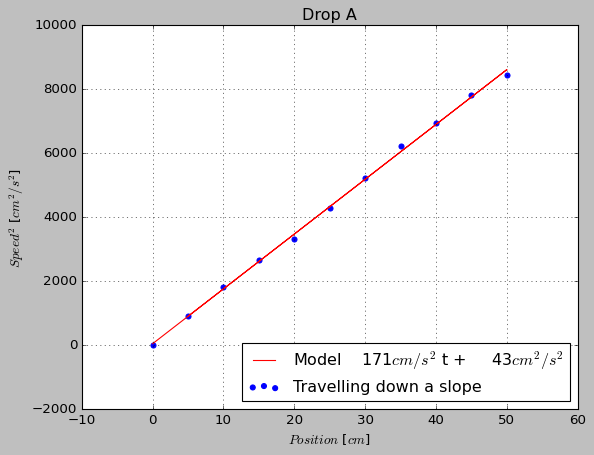

In [0]:
# plot the model
plt.plot(pos, m * pos + b,
         color="red", label=f"Model {m:6.0f}$cm/s^2$ t + {b:6.0f}$cm^2/s^2$")

# plot the raw data
plt.scatter(pos, velSq,
         color="blue", label="Travelling down a slope")

# decorate the graph with proper labels and units 
#      (the r prefix will invoke the LaTex editor)
plt.xlabel(r"$Position$ [$cm$]")
plt.ylabel(r"$Speed^2$ [$cm^2/s^2$]")
plt.title(r"Drop A")

plt.grid(True)

plt.legend(loc="lower right")

plt.show()

### Example 4
where we pull the data and get a narrow slice of the whole set.

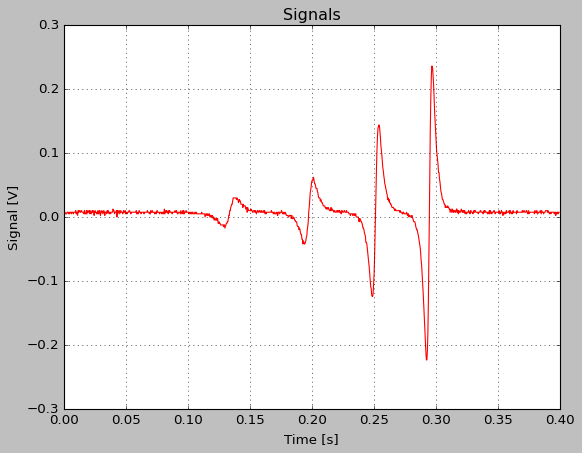

In [0]:
# set our file
csvFile = 'sample_data/MagDrop3.csv'
# since we have already looked at the contents of this file in Example 1 we know how data like
# this is structured so we don't need to change anything.

# pull in the first two columns: 0,1, with a delimiter of ',' and skip the first line, 
#     the last item allows us to pull two columns at once and set them to two separate variables at once (very pythonic)
time, volt = np.loadtxt(csvFile, skiprows=1, usecols=(0,1), delimiter=",", unpack=True)

# the following line is optional in case you want to extract the titles, just like we did above but grab only the first line.
titl0, titl1 = np.loadtxt(csvFile, max_rows=1, usecols=(0,1), delimiter=",", dtype="str", unpack=True)

## PLOT AS USUAL
plt.style.use('classic')

plt.plot(time, volt, c='r')

plt.xlabel(titl0) # Use the imported labels
plt.ylabel("Signal [V]") # Or make up your own DON'T FORGET THE UNITS!
plt.title("Signals")
plt.grid(True)

plt.show()

What we want to do is pick out a particular peak so we can get the area under the curve,  

  - First we need to get a baseline so we can 'zero' what appears to be an offset (look closely at the ends of the graph). 
  - Next we isolate the last peak
  - finally we integrate the peak and present the area of the final + going peak.

In [0]:
tailIndices = np.where( time>0.35 )
zero = np.average( volt[tailIndices] )
print(f"We will subtract the offset voltage of {zero:8.4f} V from the whole curve.")

zVolt = volt - zero

We will subtract the offset voltage of   0.0074 V from the whole curve.


This is a guessing game based on the above graph we can re-run the followin code cell so we can see where the data we want is located.

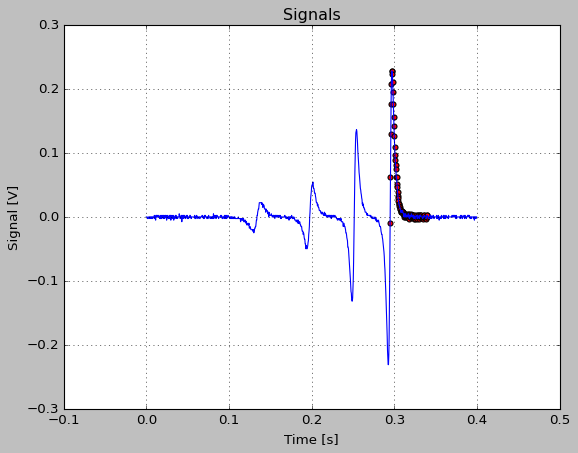

In [0]:
#peakIndixes = np.where( (time > 0.28) & (time < 0.33) )  # narrow this
#peakIndixes = np.where( (time > 0.29) & (time < 0.34) )  # better 
peakIndixes = np.where( (time > 0.2946) & (time < 0.34) ) # spot on

## PLOT AS USUAL
plt.style.use('classic')

plt.plot(time, zVolt, c='b')
plt.scatter(time[peakIndixes], zVolt[peakIndixes], c='r')

plt.xlabel(titl0) # Use the imported labels
plt.ylabel("Signal [V]") # Or make up your own DON'T FORGET THE UNITS!
plt.title("Signals")
plt.grid(True)

plt.show()

In [0]:
areaUnderGraph = np.trapz(zVolt[peakIndixes], time[peakIndixes])
print(f"The area under the last peak is {1E6*areaUnderGraph:8.1f} 𝝁V.s")

The area under the last peak is   1288.2 𝝁V.s


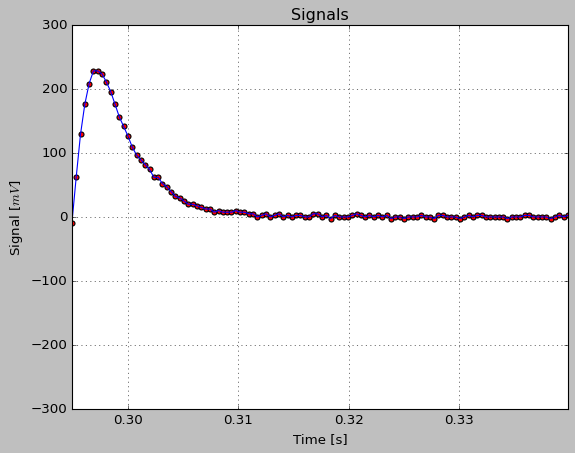

In [0]:
## PLOT AS USUAL
plt.style.use('classic')

plt.plot(time, 1E3 * zVolt, c='b')
plt.scatter(time[peakIndixes], 1E3 * zVolt[peakIndixes], c='r')
plt.xlim(time[peakIndixes][0],time[peakIndixes][-1])

plt.xlabel(titl0) # Use the imported labels
plt.ylabel("Signal [$mV$]") # Or make up your own DON'T FORGET THE UNITS!
plt.title("Signals")
plt.grid(True)

plt.show()